古腾堡语料库
NLTK包含古腾堡项目（Project Gutenberg）电子文档的一小部分文本。
该项目大约有25000（现在是36000）本免费电子书。
我们通过平均句子长度和平均词种数（词语丰富度）这两个特征，来看不同作者的写作风格。

In [1]:
# 导入古腾堡语料库
from nltk.corpus import gutenberg
# 显示古腾堡语料库中所有文件名称
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [2]:
# 平均词长特征值序列
fea1_li = []
# 平均句长特征值序列
fea2_li = []
# 平均词种数特征值序列
fea3_li = []
# 遍历每个作者所写的文本
for fileid in gutenberg.fileids():
    # 统计字符数
    num_chars = len(gutenberg.raw(fileid))
    # 统计词语数
    num_words = len(gutenberg.words(fileid))
    # 统计句子数
    num_sents = len(gutenberg.sents(fileid))
    # 统计词种数
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    # 特征1:计算平均词长
    average_word_len = int(num_chars/num_words)
    fea1_li.append(average_word_len)
    # 特征2:计算平均句长
    average_sent_len = int(num_words/num_sents)
    fea2_li.append(average_sent_len)
    # 特征3:计算平均词种数
    average_word_category = int(num_words/num_vocab)
    fea3_li.append(average_word_category)
    # 打印各特征值
    print(average_word_len, average_sent_len, average_word_category)

4 24 26
4 26 16
4 28 22
4 33 79
4 19 5
4 19 14
4 17 12
4 20 12
4 20 11
4 22 11
4 18 10
4 20 24
4 25 15
4 52 10
4 11 8
4 12 7
4 12 6
4 36 12


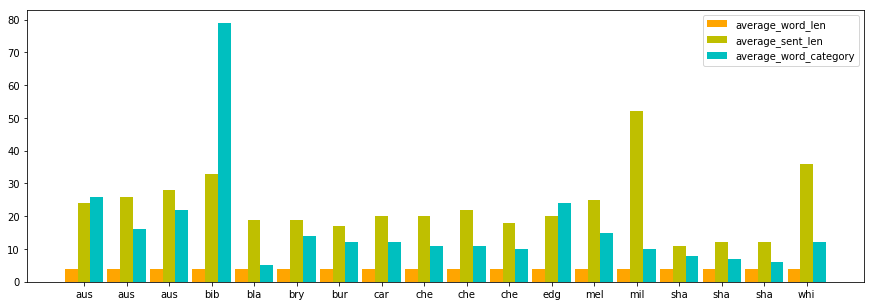

In [3]:
%matplotlib inline
# 并列柱状图
import matplotlib.pyplot as plt
import numpy as np

# 设置图片大小
plt.figure(figsize=(15,5))

#柱状图在横坐标上的位置
x = np.arange(len(gutenberg.fileids()))
#列出你要显示的数据，数据的列表长度与x长度相同
y1 = fea1_li
y2 = fea2_li
y3 = fea3_li

#设置柱状图的宽度
bar_width = 0.3
tick_label = [w[:3] for w in gutenberg.fileids()]

#绘制并列柱状图
plt.bar(x,y1,bar_width,color='orange',label='average_word_len')
plt.bar(x+bar_width, y2, bar_width, color='y',label='average_sent_len')
plt.bar(x+2*bar_width, y3, bar_width, color='c', label='average_word_category')

#显示图例，即label
plt.legend(loc='upper right')
#显示x坐标轴的标签,即tick_label,调整位置，使其落在两个直方图中间位置
plt.xticks(x+bar_width,tick_label)
plt.show()

（1）相同作者的3个特征值基本一致
（2）平均词长特征对于不同作者来说没有区分度